In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



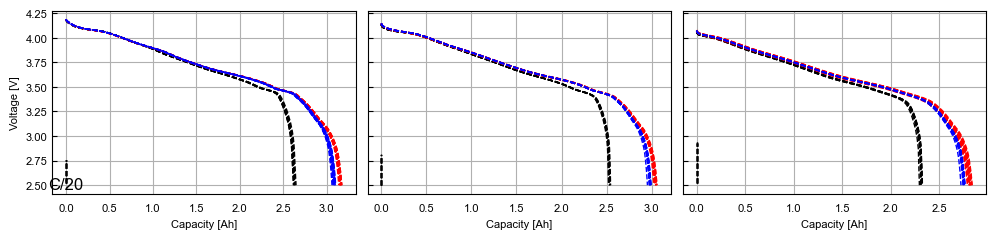

In [9]:


script_dir = os.getcwd()

# 폴더 경로를 설정합니다.
folders = {
    'No_1st': os.path.join(script_dir, '1-No x-ray(1-5)/1st RPT'),
    'No_2nd': os.path.join(script_dir, '1-No x-ray(1-5)/2nd RPT'),
    'No_3rd': os.path.join(script_dir, '1-No x-ray(1-5)/3rd RPT'),
    '2 minutes_1st': os.path.join(script_dir, '2-2m damage(6-10)/1st RPT'),
    '2 minutes_2nd': os.path.join(script_dir, '2-2m damage(6-10)/2nd RPT'),
    '2 minutes_3rd': os.path.join(script_dir, '2-2m damage(6-10)/3rd RPT'),
    '1 Hour_1st': os.path.join(script_dir, '3-1H damage(11-15)/1st RPT'),
    '1 Hour_2nd': os.path.join(script_dir, '3-1H damage(11-15)/2nd RPT'),
    '1 Hour_3rd': os.path.join(script_dir, '3-1H damage(11-15)/3rd RPT')   
}

colors = {
    'No_1st': 'red',
    'No_2nd': 'blue',
    'No_3rd': 'black',
    '2 minutes_1st': 'red',
    '2 minutes_2nd': 'blue',
    '2 minutes_3rd': 'black',
    '1 Hour_1st': 'red',
    '1 Hour_2nd': 'blue',
    '1 Hour_3rd': 'black'
}

steps = [6, 10, 14]

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data

def plot_data(folder, step_index, ax, color):
    for filename in os.listdir(folder):
        if filename.endswith('.xlsx'):
            filepath = os.path.join(folder, filename)
            df = pd.read_excel(filepath, header=0, sheet_name='record')
            voltage_data, capacity_data = filter_data(df, step_index)
            ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, label='Charge', color=color)

fig, axes = plt.subplots(1,3, figsize=(fig_width_3col_inches, fig_height), sharey=True)

for folder_name, folder_path in folders.items():
    color = colors[folder_name]
    for i, step_index in enumerate(steps):
        plot_data(folder_path, step_index, axes[i], color)



    axes[0].set_ylabel('Voltage [V]')
    axes[0].set_xlabel('Capacity [Ah]')
    axes[1].set_xlabel('Capacity [Ah]')
    axes[2].set_xlabel('Capacity [Ah]')
    axes[0].grid(True)
    axes[1].grid(True)
    axes[2].grid(True)

axes[0].plot([], [], linestyle='--', linewidth=1, color='red', label='1st RPT')
axes[0].plot([], [], linestyle='--', linewidth=1, color='blue', label='2nd RPT')
axes[0].plot([], [], linestyle='--', linewidth=1, color='black', label='3rd RPT')
axes[0].text(0.2, 2.7, 'C/20', fontsize=12, color='black', ha='center', va='center')
axes[1].text(0.2, 2.7, 'C/5', fontsize=12, color='black', ha='center', va='center')
axes[2].text(0.2, 2.7, 'C/2', fontsize=12, color='black', ha='center', va='center')

plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

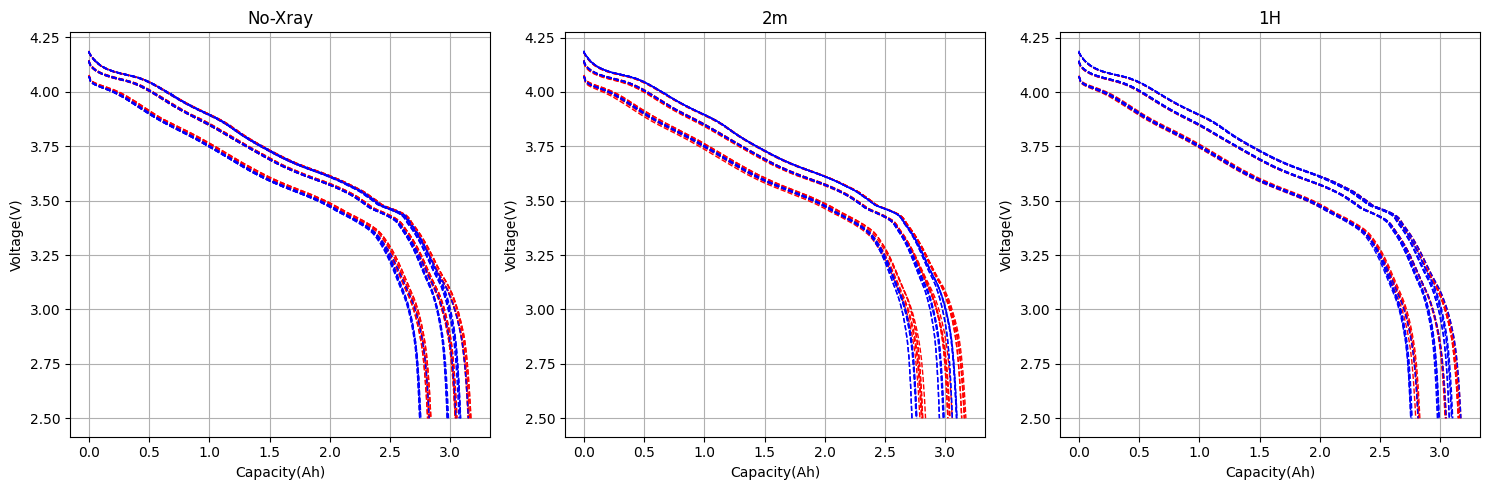

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
folder_No_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/1st RPT'
folder_No_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/2nd RPT'

folder_2 minutes_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/1st RPT'
folder_2 minutes_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/2nd RPT'

folder_1 Hour_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/1st RPT'
folder_1 Hour_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/2nd RPT'

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data, filtered_df

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[0].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='red')

# 두 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[0].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='blue')

# 세 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2 minutes_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2 minutes_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[1].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='red')

# 네 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2 minutes_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2 minutes_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[1].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='blue')

# 다섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1 Hour_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1 Hour_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[2].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='red')

# 여섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1 Hour_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1 Hour_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for step_index in [6, 10, 14]:
        filtered_df = filter_data(df, step_index)
        axes[2].plot(filtered_df[1], filtered_df[0], linestyle='--', linewidth=1, label='Charge', color='blue')

step_titles = ['No X-ray', '2 minutes', '1 Hour']
for i, ax in enumerate(axes):
    ax.set_title(step_titles[i])
    ax.set_xlabel('Capacity(Ah)')
    ax.set_ylabel('Voltage(V)')
    ax.grid(True)

    # # x축 및 y축 범위 설정 (여기서 원하는 범위로 설정)
    # ax.set_xlim(0, 3.75)  # 예시로 x축 범위를 0에서 2로 설정
    # ax.set_ylim(2.25, 4.5)  # 예시로 y축 범위를 2.5에서 4.5로 설정

plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

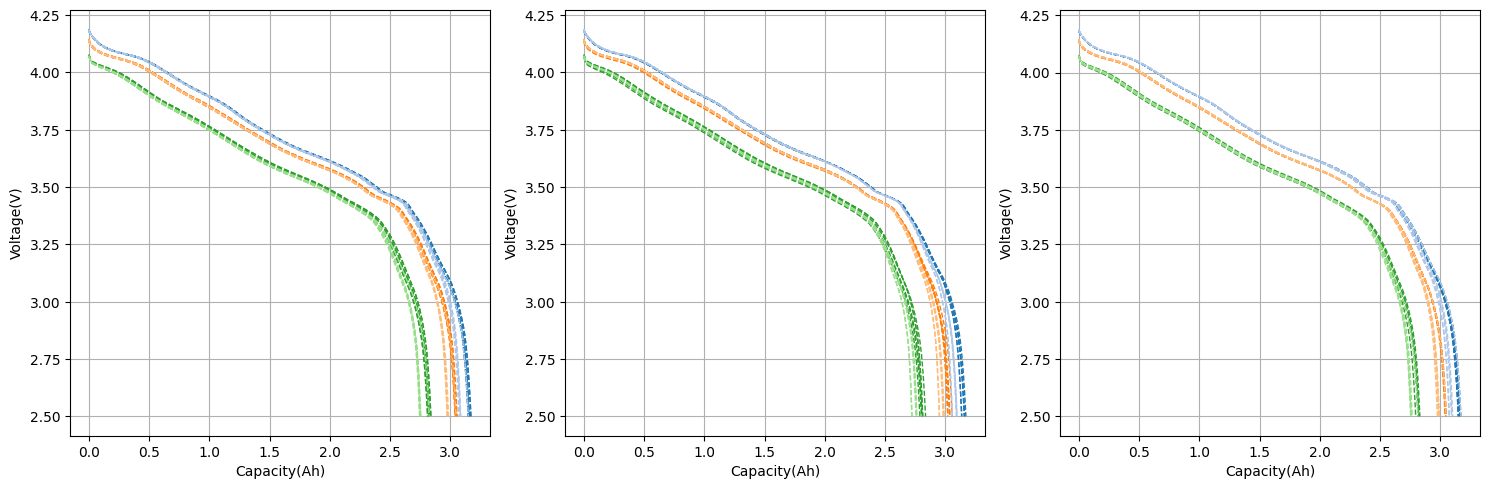

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
folder_No_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/1st RPT'
folder_No_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/2nd RPT'

folder_2 minutes_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/1st RPT'
folder_2 minutes_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/2nd RPT'

folder_1 Hour_1st = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/1st RPT'
folder_1 Hour_2nd = '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/2nd RPT'

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data, filtered_df

# 현대적이고 이쁜 색상 세 가지와 채도를 낮춘 색상 세 가지를 선정합니다.
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 모던한 색상
colors_2nd = ['#aec7e8', '#ffbb78', '#98df8a']  # 채도를 낮춘 색상

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_1st[i])

# 두 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_No_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_No_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[0].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 세 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2 minutes_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2 minutes_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_1st[i])

# 네 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_2 minutes_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_2 minutes_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[1].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

# 다섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1 Hour_1st):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1 Hour_1st, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_1st[i])

# 여섯 번째 폴더의 모든 엑셀 파일을 불러옵니다.
for filename in os.listdir(folder_1 Hour_2nd):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(folder_1 Hour_2nd, filename)
        df = pd.read_excel(filepath, header=0, sheet_name='record')
        
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data, filtered_df = filter_data(df, step_index)
        axes[2].plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color=colors_2nd[i])

step_titles = ['No X-ray', '2 minutes', '1 Hour']
for i, ax in enumerate(axes):
    # ax.set_title(step_titles[i])
    ax.set_xlabel('Capacity(Ah)')
    ax.set_ylabel('Voltage(V)')
    ax.grid(True)

plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

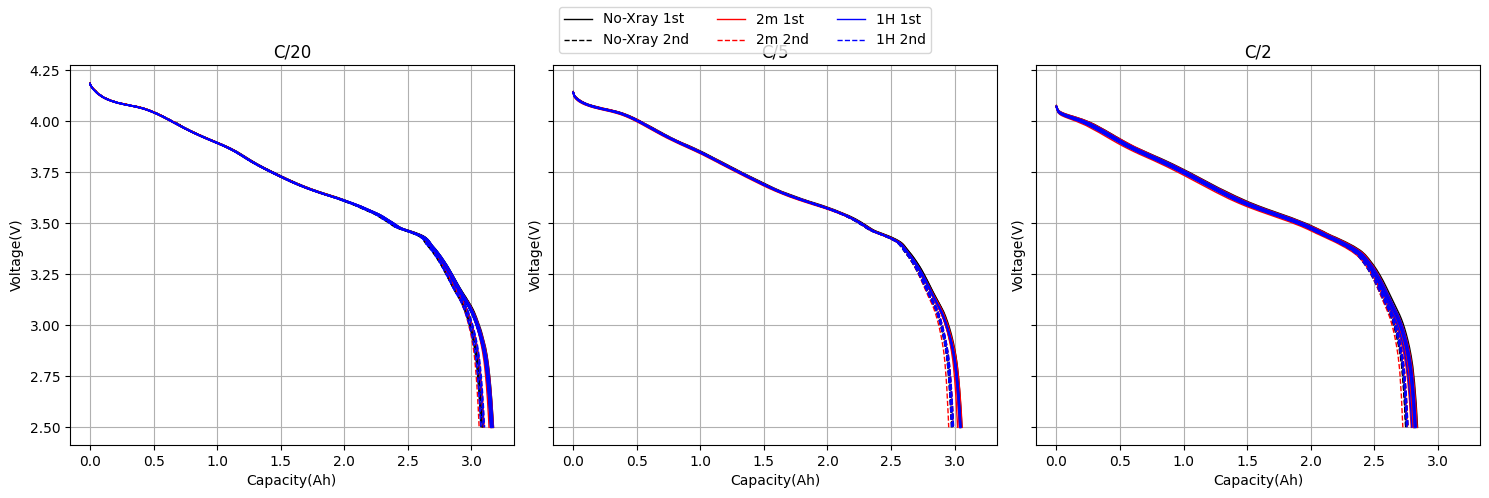

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
folder_paths = {
    'No X-ray 1st': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/1st RPT',
    'No X-ray 2nd': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/2nd RPT',
    '2 minutes 1st': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/1st RPT',
    '2 minutes 2nd': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/2-2 minutes damage(6-10)/2nd RPT',
    '1 Hour 1st': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/1st RPT',
    '1 Hour 2nd': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1 Hour damage(11-15)/2nd RPT'
}

# 데이터를 저장할 빈 리스트를 생성합니다.
data = {step: [] for step in [6, 10, 14]}

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
        
    return voltage_data, capacity_data, filtered_df

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

colors = {
    'No X-ray': 'black',
    '2 minutes': 'red',
    '1 Hour': 'blue'
}

linestyles = {
    '1st': 'solid',
    '2nd': 'dashed'
}

for label, folder_path in folder_paths.items():
    group, order = label.split()
    for filename in os.listdir(folder_path):
        if filename.endswith('.xlsx'):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_excel(filepath, header=0, sheet_name='record')
            
            for i, step_index in enumerate([6, 10, 14]):
                filtered_df = filter_data(df, step_index)
                axes[i].plot(filtered_df[1], filtered_df[0], linestyle=linestyles[order], linewidth=1, color=colors[group], label=f'{label}')

# 각 플롯에 제목과 라벨 추가
step_titles = ['C/20', 'C/5', 'C/2']
for i, ax in enumerate(axes):
    ax.set_title(step_titles[i])
    ax.set_xlabel('Capacity(Ah)')
    ax.set_ylabel('Voltage(V)')
    ax.grid(True)

# 범례 추가 (중복되지 않도록 한번만 추가)
handles, labels = axes[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper center', ncol=3)

# 플롯 표시하기
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workboo

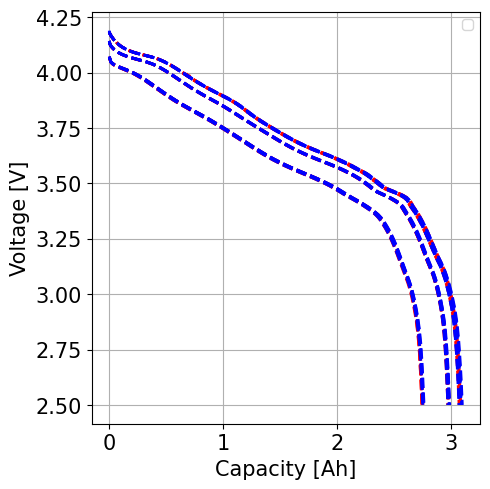

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 폴더 경로를 설정합니다.
folders = {
    'No_2nd': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/1-No x-ray(1-5)/2nd RPT',
    '1 Hour_2nd': '/Users/jinhong/Downloads/Xray beam damage/Plotting/Fig1/3-1H damage(11-15)/2nd RPT'
}

colors = {
    'No_2nd': 'red',
    '1 Hour_2nd': 'blue'
}

steps = [6, 10, 14]

def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    return voltage_data, capacity_data

def plot_data(folder, step_index, ax, color):
    for filename in os.listdir(folder):
        if filename.endswith('.xlsx'):
            filepath = os.path.join(folder, filename)
            df = pd.read_excel(filepath, header=0, sheet_name='record')
            voltage_data, capacity_data = filter_data(df, step_index)
            ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=2, color=color)

fig, ax = plt.subplots(figsize=(5, 5))

for folder_name, folder_path in folders.items():
    color = colors[folder_name]
    for step_index in steps:
        plot_data(folder_path, step_index, ax, color)

ax.grid(True)
ax.set_xlabel('Capacity [Ah]', fontsize=15)
ax.set_ylabel('Voltage [V]', fontsize=15)
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.show()

group
1 Hour       3.15946
2 minutes    3.15946
No X-ray     3.15896
Name: capacity, dtype: float64
group
1 Hour       3.08874
2 minutes    3.09004
No X-ray     3.09004
Name: capacity, dtype: float64
group
1 Hour       3.04026
2 minutes    3.04026
No X-ray     3.04816
Name: capacity, dtype: float64
group
1 Hour       2.98508
2 minutes    2.98170
No X-ray     2.98170
Name: capacity, dtype: float64
group
1 Hour       2.81136
2 minutes    2.81136
No X-ray     2.82672
Name: capacity, dtype: float64
group
1 Hour       2.75954
2 minutes    2.75578
No X-ray     2.75578
Name: capacity, dtype: float64


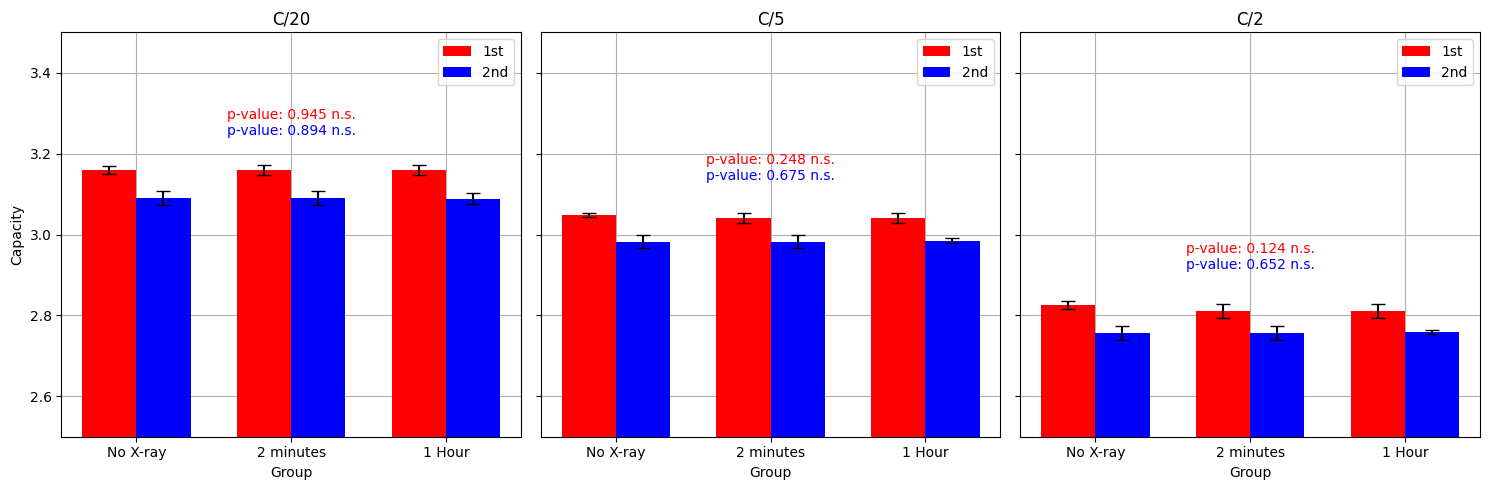

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bar_width = 0.35

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    print(means_1st)
    print(means_2nd)
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color='r', capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color='b', capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.12, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color='r', zorder=5)
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.08, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color='b', zorder=5)

    axes[i].set_title(f'{c_rate}')
    axes[i].set_xlabel('Group')
    axes[i].set_xticks(indices + bar_width / 2)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.5, 3.5])  # y축 범위 설정
    if i == 0:
        axes[i].set_ylabel('Capacity')
    axes[i].legend()

# 플롯 표시하기
plt.tight_layout()
plt.show()

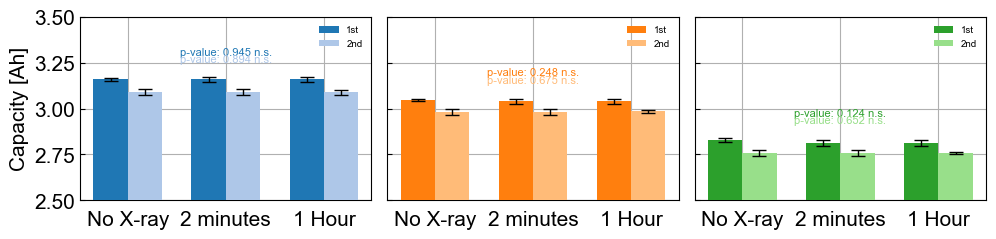

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 모던한 색상
colors_2nd = ['#aec7e8', '#ffbb78', '#98df8a']  # 채도를 낮춘 색상

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.35

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.12, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=5)
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.08, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=5)

    # axes[i].set_title(f'{c_rate}')

    axes[i].set_xticks(indices + bar_width / 2)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.5, 3.5])  # y축 범위 설정
    # axes[i].grid(True)

    axes[i].legend()
    axes[i].tick_params(axis='both', which='major', labelsize=15) 
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]', fontsize=15)
    # axes[i].legend()

plt.tight_layout()
plt.show()

  order c-rate     group  Overpotential
0   1st   C/20  No X-ray         3.7081
1   1st   C/20  No X-ray         3.7091
2   1st   C/20  No X-ray         3.7060
3   1st   C/20  No X-ray         3.7038
4   1st   C/20  No X-ray         3.7050
group
1 Hour       3.70574
2 minutes    3.70574
No X-ray     3.70640
Name: Overpotential, dtype: float64
group
1 Hour       3.71600
2 minutes    3.71676
No X-ray     3.71676
Name: Overpotential, dtype: float64
group
1 Hour       3.68254
2 minutes    3.68254
No X-ray     3.68444
Name: Overpotential, dtype: float64
group
1 Hour       3.69322
2 minutes    3.69370
No X-ray     3.69370
Name: Overpotential, dtype: float64
group
1 Hour       3.61838
2 minutes    3.61838
No X-ray     3.62284
Name: Overpotential, dtype: float64
group
1 Hour       3.62706
2 minutes    3.62806
No X-ray     3.62806
Name: Overpotential, dtype: float64


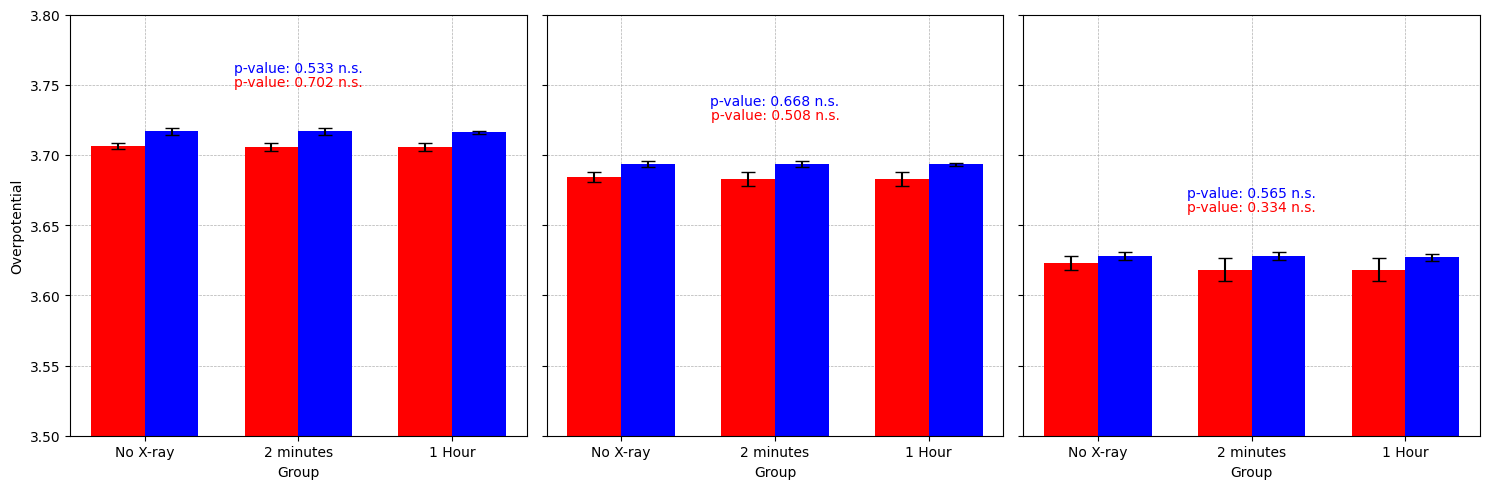

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path, header=0, sheet_name='Sheet3')

# 데이터 확인
print(df.head())

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bar_width = 0.35

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].std()
    print(means_1st)
    print(means_2nd)
    indices = np.arange(len(groups))

    # 그리드를 뒤로 보내기 위해 먼저 그리드 설정
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color='r', capsize=5, zorder=2)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color='b', capsize=5, zorder=2)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['Overpotential']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['Overpotential']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['Overpotential']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['Overpotential']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.03, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color='r', zorder=3)
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.04, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color='b', zorder=3)

    # axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.12, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color='r', zorder=5)
    # axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.08, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color='b', zorder=5)



    # axes[i].set_title(f'{c_rate}')
    axes[i].set_xlabel('Group')
    axes[i].set_xticks(indices + bar_width / 2)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([3.5, 3.8])  # y축 범위 설정
    if i == 0:
        axes[i].set_ylabel('Overpotential')
    # axes[i].legend()

# 플롯 표시하기
plt.tight_layout()
plt.show()

  order c-rate     group  Overpotential
0   1st   C/20  No X-ray         3.7081
1   1st   C/20  No X-ray         3.7091
2   1st   C/20  No X-ray         3.7060
3   1st   C/20  No X-ray         3.7038
4   1st   C/20  No X-ray         3.7050
group
1 Hour       3.70574
2 minutes    3.70574
No X-ray     3.70640
Name: Overpotential, dtype: float64
group
1 Hour       3.71600
2 minutes    3.71676
No X-ray     3.71676
Name: Overpotential, dtype: float64
group
1 Hour       3.68254
2 minutes    3.68254
No X-ray     3.68444
Name: Overpotential, dtype: float64
group
1 Hour       3.69322
2 minutes    3.69370
No X-ray     3.69370
Name: Overpotential, dtype: float64
group
1 Hour       3.61838
2 minutes    3.61838
No X-ray     3.62284
Name: Overpotential, dtype: float64
group
1 Hour       3.62706
2 minutes    3.62806
No X-ray     3.62806
Name: Overpotential, dtype: float64


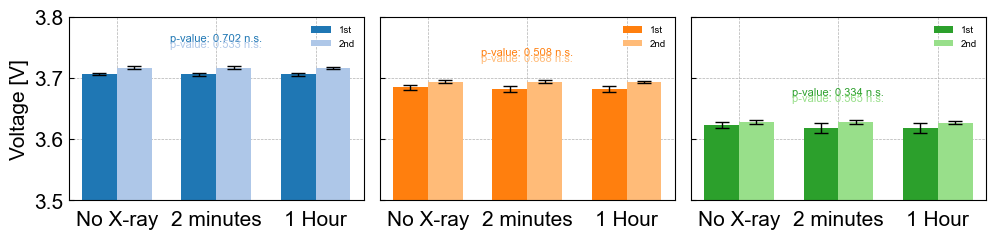

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path, header=0, sheet_name='Sheet3')

# 데이터 확인
print(df.head())

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 모던한 색상
colors_2nd = ['#aec7e8', '#ffbb78', '#98df8a']  # 채도를 낮춘 색상

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.35

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].std()
    print(means_1st)
    print(means_2nd)
    indices = np.arange(len(groups))

    # 그리드를 뒤로 보내기 위해 먼저 그리드 설정
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=2)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=2)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['Overpotential']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['Overpotential']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['Overpotential']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['Overpotential']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.04, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=3)
    axes[i].text(1 + bar_width/2, max(means_1st.max(), means_2nd.max()) + 0.03, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=3)



    axes[i].set_xticks(indices + bar_width / 2)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([3.5, 3.8])  # y축 범위 설정
    # axes[i].grid(True)

    axes[i].legend()
    axes[i].tick_params(axis='both', which='major', labelsize=15) 
    if i == 0:
        axes[i].set_ylabel('Voltage [V]', fontsize=15)
    # axes[i].legend()

plt.tight_layout()
plt.show()